In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load data
train_df = pd.read_csv("Train_Data.csv")

In [3]:
# Encode target
train_df['age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1})
train_df = train_df.dropna(subset=['age_group'])

In [4]:
# Split features and target
X = train_df.drop(columns=['SEQN', 'age_group'])
y = train_df['age_group'].astype(int)

In [5]:
# --- EDA ---
eda_df = X.copy()
eda_df['age_group'] = y

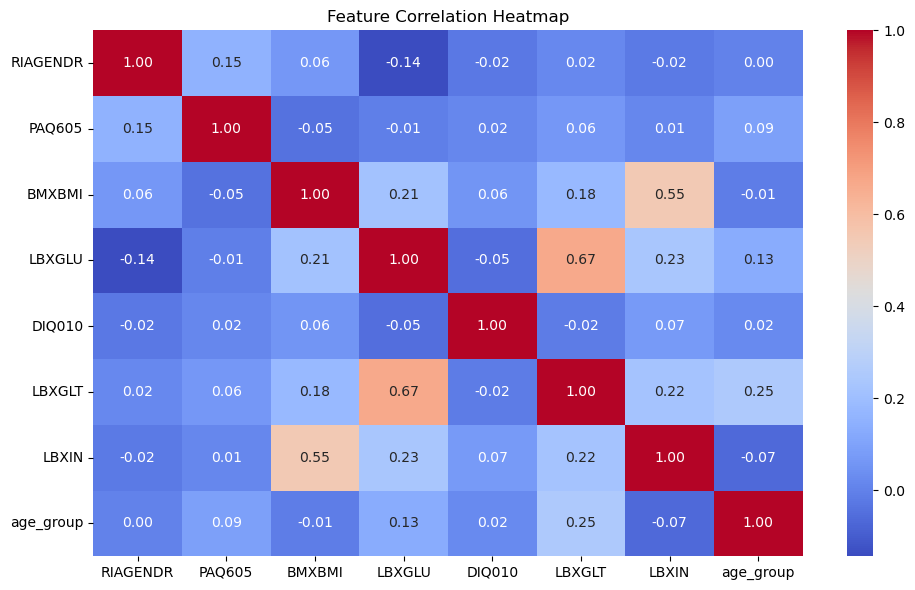

In [6]:
# 1. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(eda_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [7]:
# 2. KDE plots of important features (ensure clean numeric input)
eda_df_fixed = eda_df.copy()
for col in eda_df_fixed.columns:
    eda_df_fixed[col] = pd.to_numeric(eda_df_fixed[col], errors='coerce')

eda_df_fixed = eda_df_fixed[['BMXBMI', 'LBXGLU', 'LBXIN', 'age_group']].dropna()

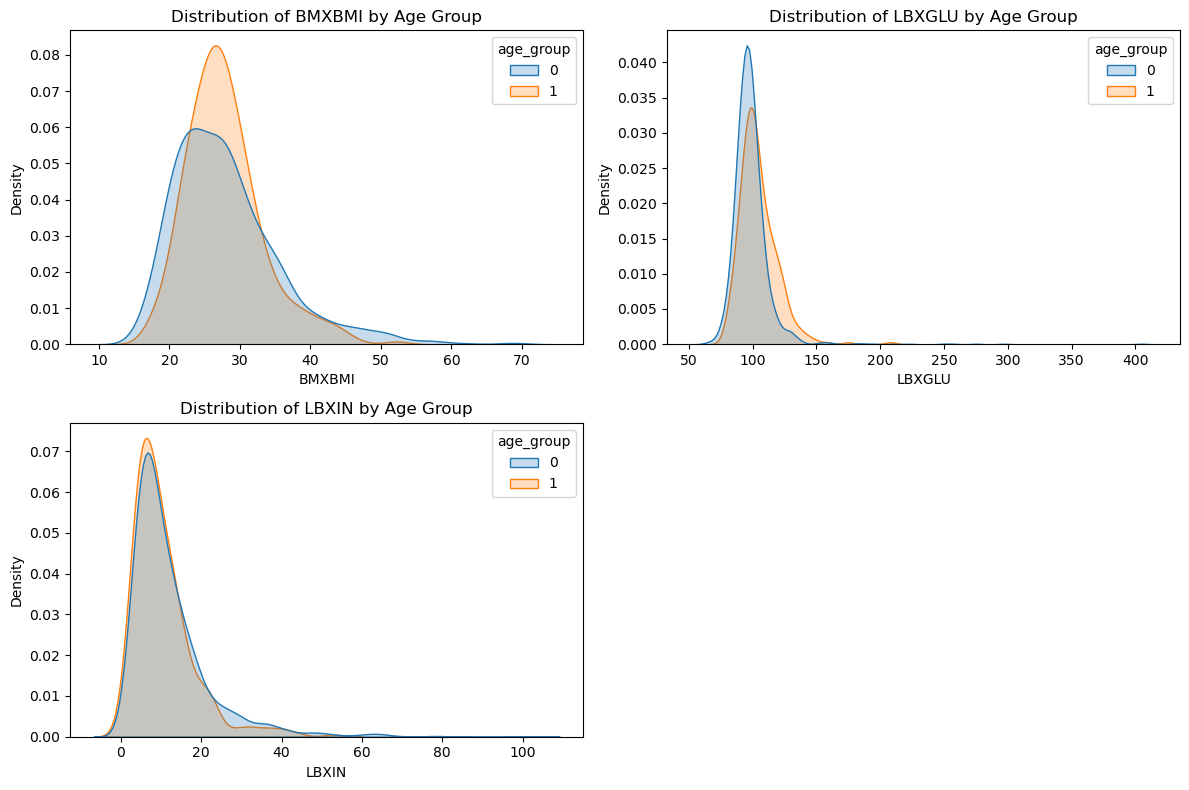

In [8]:
plt.figure(figsize=(12, 8))
for idx, col in enumerate(['BMXBMI', 'LBXGLU', 'LBXIN']):
    plt.subplot(2, 2, idx + 1)
    sns.kdeplot(data=eda_df_fixed, x=col, hue='age_group', fill=True, common_norm=False)
    plt.title(f"Distribution of {col} by Age Group")
plt.tight_layout()
plt.show()

In [9]:
# --- Model pipeline ---
pipeline = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    ))
])

In [10]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', IterativeImputer(random_state=42)),
                ('scaler', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                                            n_estimators=150,
                                            random_state=42))])

In [12]:
# Evaluate model
val_preds = pipeline.predict(X_val)
accuracy = accuracy_score(y_val, val_preds)
report = classification_report(y_val, val_preds, target_names=["Adult", "Senior"])


In [13]:
print(f"\nValidation Accuracy: {accuracy:.4f}\n")
print(report)



Validation Accuracy: 0.8619

              precision    recall  f1-score   support

       Adult       0.90      0.95      0.92       340
      Senior       0.45      0.25      0.33        51

    accuracy                           0.86       391
   macro avg       0.67      0.60      0.62       391
weighted avg       0.84      0.86      0.85       391

